This document investigates the darks from FUN-040-01-1.  

- This dataset is better for readout noise analysis since NDIT=1. From 2-second readouts, I estimate the read noise to be around 4.33 ADU rms (slightly differing for readout schemes). *Increase in the noise for longer integration times is a signature of dark current plus some other factors.* 
- Note that noise drops as the exposure time increases in UTR. This was confusing to me at first. After investigating, I found that the exposure time in UTR mode is controlled by NDSAMPLES. 
- The net integration time in UTR should be multiples of frame time (1.59 secs) since NDSAMPLES of 2, 7, 38 are assigned to exposure times of 2, 10, 60 seconds. So, the net integration times are actually 1.6, 9.6, 58.8 seconds respectively. But, in the header, these values are only noted under MINDIT which is actually minimum integration time for a given NDSAMPLES - not the net integration time. Also, what happens when exposure time > 1.59x64? 
- In some cases, first darks are bright after switching integration (see CDS_10sec or FOWLER_60sec). I am not sure why this is the case.
- Looked at the bad pixels. They are clearly outliers in pixel-by-pixel variance maps. Also, these pixels are shown unreliable simply dividing two frames with different integration time (shown in the last figure). Simply, the response of dark and bright pixels can't be corrected via a flatfield image. Unfortunately, we have no option but to filter the dark valleys and noisy regions around it.  
- On an unrelated note, temperature of the mechanisms reported in the fits files doesn't make sense to me. See the relevant header info below:
```
HIERARCH ESO INS2 TEMP100 VAL = 1114.0 / [C] NIX Aperture wheel,Temp            
HIERARCH ESO INS2 TEMP101 VAL = 1125.0 / [C] NIX Camera wheel,  Temp            
HIERARCH ESO INS2 TEMP102 VAL = 1106.0 / [C] NIX Filter wheel,  Temp            
HIERARCH ESO INS2 TEMP103 VAL = 1102.0 / [C] NIX Pupil wheel,   Temp            
HIERARCH ESO INS2 TEMP104 VAL = 1122.0 / [C] NIX ImagerSelect,  Temp            
HIERARCH ESO INS2 TEMP105 VAL = 1915.0 / [C] NIX DetFocusing,   Temp            
HIERARCH ESO INS2 TEMP150 VAL = 67.65 / [K] NIX Optical bench1, Temp            
HIERARCH ESO INS2 TEMP151 VAL = 68.05 / [K] NIX Optical bench2, Temp            
HIERARCH ESO INS2 TEMP152 VAL = 65.95 / [K] NIX Sorption pump, Temp             
HIERARCH ESO INS2 TEMP153 VAL = 55.05 / [K] NIX CCC 1st stage, Temp             
HIERARCH ESO INS2 TEMP154 VAL = 56.25 / [K] NIX CCC 2nd stage, Temp             
HIERARCH ESO INS2 TEMP155 VAL = 888.80 / [K] NIX Optical bench spare, Temp      
HIERARCH ESO INS2 TEMP156 VAL = 68.25 / [K] NIX Optical bench3, Temp            
HIERARCH ESO INS2 TEMP157 VAL = 68.15 / [K] NIX Optical bench4, Temp            
HIERARCH ESO INS2 TEMP158 VAL = 888.80 / [K] NIX CCC inlet, Temp                
HIERARCH ESO INS2 TEMP159 VAL = 888.80 / [K] NIX CCC outlet, Temp               
HIERARCH ESO INS2 TEMP190 VAL = 35.00 / [K] NIX detector Temp        
```


In [1]:
from guppy import hpy
h = hpy()

In [2]:
from pylab import *
FRM_TIME = 1.59
ND_SAMPLES = array([2., 7., 38.])
print FRM_TIME*(ND_SAMPLES-1)

[ 1.59  9.54 58.83]


In [3]:
from NIX_Testing import NIX_Image_List, NIX_Image, doGridAnalysis
from astropy.io import fits
from lmfit.models import GaussianModel

data_dir = '/home/ydallilar/Documents/NIX/nixDetBackup'

test_ids = ['FUN-040-01-1-a', 'FUN-040-01-1-b']
config = {'test_ids' : test_ids, 'data_dir' : data_dir}
NIX_GL = NIX_Image_List(config)

In [4]:
keywords = ['MJD-OBS', 'HIERARCH ESO DET READ CURNAME', 'HIERARCH ESO DET SEQ1 DIT']
tbl_fmt = '%15s,%35s,%20s,%20s%10s'

NIX_GL.printTable(keywords, tbl_fmt)

 NDX        TEST_ID,                           FILENAME,             MJD-OBS,    DET_READ_CURNAMEDET_SEQ1_DIT
0000 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0007.fits,       58707.7510148,    SLOW_UP_THE_RAMP       2.0
0001 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0008.fits,       58707.7513599,         SLOW_LR_CDS       2.0
0002 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0009.fits,       58707.7516898,      SLOW_LR_FOWLER       2.0
0003 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0010.fits,       58707.7520057,    SLOW_UP_THE_RAMP      10.0
0004 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0011.fits,       58707.7525607,         SLOW_LR_CDS      10.0
0005 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0012.fits,       58707.7530783,      SLOW_LR_FOWLER      10.0
0006 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0013.fits,       58707.7535787,    SLOW_UP_THE_RAMP      60.0
0007 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0014.fits,       58707.7554068,         SLOW_LR_CDS      60.0
0008 FUN-040-01-1-a,    ER

0084 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0096.fits,       58708.7196243,    SLOW_UP_THE_RAMP      10.0
0085 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0097.fits,       58708.7199472,    SLOW_UP_THE_RAMP      10.0
0086 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0098.fits,       58708.7202725,    SLOW_UP_THE_RAMP      10.0
0087 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0099.fits,       58708.7206136,    SLOW_UP_THE_RAMP      10.0
0088 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0100.fits,       58708.7209431,    SLOW_UP_THE_RAMP      10.0
0089 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0101.fits,       58708.7212664,    SLOW_UP_THE_RAMP      10.0
0090 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0102.fits,       58708.7215905,    SLOW_UP_THE_RAMP      10.0
0091 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0103.fits,       58708.7219331,    SLOW_UP_THE_RAMP      10.0
0092 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0104.fits,       58708.7222579,    SLOW_UP_THE_RAMP      10.0
0093 FUN-040-01-1-a,    ERIS

0172 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0184.fits,       58708.8101125,         SLOW_LR_CDS       2.0
0173 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0185.fits,       58708.8102054,         SLOW_LR_CDS       2.0
0174 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0186.fits,       58708.8103018,         SLOW_LR_CDS       2.0
0175 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0187.fits,       58708.8104067,         SLOW_LR_CDS       2.0
0176 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0188.fits,       58708.8105494,         SLOW_LR_CDS       2.0
0177 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0189.fits,       58708.8106884,         SLOW_LR_CDS       2.0
0178 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0190.fits,       58708.8108264,         SLOW_LR_CDS       2.0
0179 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0191.fits,        58708.810922,         SLOW_LR_CDS       2.0
0180 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0192.fits,       58708.8110177,         SLOW_LR_CDS       2.0
0181 FUN-040-01-1-a,    ERIS

0257 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0269.fits,       58708.8277018,         SLOW_LR_CDS      10.0
0258 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0270.fits,       58708.8279799,         SLOW_LR_CDS      10.0
0259 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0271.fits,        58708.828261,         SLOW_LR_CDS      10.0
0260 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0272.fits,       58708.8285374,         SLOW_LR_CDS      10.0
0261 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0273.fits,       58708.8288365,         SLOW_LR_CDS      10.0
0262 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0274.fits,       58708.8291392,         SLOW_LR_CDS      60.0
0263 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0275.fits,        58708.830618,         SLOW_LR_CDS      60.0
0264 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0276.fits,       58708.8320565,         SLOW_LR_CDS      60.0
0265 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0277.fits,       58708.8334926,         SLOW_LR_CDS      60.0
0266 FUN-040-01-1-a,    ERIS

0338 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0350.fits,       58708.9046425,      SLOW_LR_FOWLER       2.0
0339 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0351.fits,       58708.9047814,      SLOW_LR_FOWLER       2.0
0340 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0352.fits,       58708.9049198,      SLOW_LR_FOWLER       2.0
0341 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0353.fits,       58708.9050592,      SLOW_LR_FOWLER       2.0
0342 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0354.fits,       58708.9051985,      SLOW_LR_FOWLER       2.0
0343 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0355.fits,       58708.9053412,      SLOW_LR_FOWLER       2.0
0344 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0356.fits,       58708.9054765,      SLOW_LR_FOWLER       2.0
0345 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0357.fits,       58708.9056144,      SLOW_LR_FOWLER       2.0
0346 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0358.fits,       58708.9057579,      SLOW_LR_FOWLER       2.0
0347 FUN-040-01-1-a,    ERIS

0436 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0448.fits,       58708.9564523,      SLOW_LR_FOWLER      60.0
0437 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS225_0449.fits,        58708.957889,      SLOW_LR_FOWLER      60.0
0438 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS226_0001.fits,       58708.9593226,      SLOW_LR_FOWLER      60.0
0439 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS226_0002.fits,        58708.960758,      SLOW_LR_FOWLER      60.0
0440 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS226_0003.fits,       58708.9621944,      SLOW_LR_FOWLER      60.0
0441 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS226_0004.fits,       58708.9636279,      SLOW_LR_FOWLER      60.0
0442 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS226_0005.fits,       58708.9650634,      SLOW_LR_FOWLER      60.0
0443 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS226_0006.fits,       58708.9665004,      SLOW_LR_FOWLER      60.0
0444 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS226_0007.fits,       58708.9679343,      SLOW_LR_FOWLER      60.0
0445 FUN-040-01-1-a,    ERIS

In [5]:
NIX_GL.filter(slice(462, 476, 1))
keywords = ['MJD-OBS', 'HIERARCH ESO DET NDSAMPLES', 'HIERARCH ESO DET NDIT']
tbl_fmt = '%15s,%35s,%20s,%15s,%10s'

NIX_GL.printFiltered(keywords, tbl_fmt)
meds = NIX_GL.getMedian()
exp = array(NIX_GL.getHeaderValue('HIERARCH ESO DET SEQ1 DIT'))


 NDX        TEST_ID,                           FILENAME,             MJD-OBS,  DET_NDSAMPLES,  DET_NDIT
0000 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0025.fits,        58708.993951,              2,         3
0001 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0026.fits,       58708.9942528,              2,         3
0002 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0027.fits,       58708.9945083,              2,         3
0003 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0028.fits,        58708.994784,              7,         3
0004 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0029.fits,       58708.9954811,              7,         3
0005 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0030.fits,       58708.9961462,              7,         3
0006 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0031.fits,       58708.9968286,             38,         3
0007 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0032.fits,        58709.000058,             38,         3
0008 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0033.fits,       5

In [6]:
RNs = []
RN_err = []
RN_std = []
def doAnalysis(select, suffix):

    print '#'*80    
    print '# %-77s#' % suffix
    print '#'*80
    NIX_GL.filter(select)
    res, diffs = NIX_GL.getPixelVariance(shift=True)
    res = sqrt(res)
    
    res1d = ravel(res)

    f, ax = subplots()
    hist, bins = histogram(res1d, 200, range=[0, 20])
    bins = (bins[1:] + bins[:-1])/2.

    model = GaussianModel()
    pars = model.guess(hist, x=bins)
    out = model.fit(hist, pars, x=bins)
    print out.fit_report()

    RNs.append(out.params['center'].value)
    RN_err.append(out.params['center'].stderr)
    RN_std.append(out.params['sigma'].value)
    
    ax.plot(bins, hist, 'k', drawstyle='steps-mid')
    ax.plot(bins, out.best_fit, 'r--')
    ax.set_xlim([0, 10])
    ax.set_ylabel('Pixels')
    ax.set_xlabel('Noise (ADU rms)')
    
    ax2 = ax.twinx()
    
    cums = cumsum(hist)/(2048.*2048)*100
    
    ax2.plot(bins, cums, 'g-', drawstyle='steps-mid')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.set_ylabel('Cumulative (%)', color='g')
    ax2.set_ylim([0, 100])

    limp = [98, 99]
    lims = [min(bins[where(cums > 98)[0]]), min(bins[where(cums > 99)[0]])]

    figure()
    plot(diffs[1:], 'k.')
    title('Stability of the darks (Mean: %4.1f, Std: %4.1f)' % (mean(diffs[1:]), std(diffs[1:])))
    ylabel('median(Im_i - Im_0)')
    xlabel('Image Number')
    
    f, axs = subplots(1, 2, figsize=(16,7))
    for i in range(len(lims)):
        ax2.plot([lims[i], lims[i]], [0, 100], 'g--')
        
        out = zeros([2048, 2048])
        out[where(res > lims[i])] = 1
        axs[i].set_title('Outliers %d%% / Noise > %2d' % (limp[i], lims[i]))
        axs[i].imshow(out, cmap=cm.gray, origin='lower')

    show()
    fits.PrimaryHDU(res).writeto('out/Dark_Variance_%s.fits' % suffix, overwrite=True)
    #print h.heap()

In [7]:
selects = [[12, 62], [62, 112], [112, 162],
          [162, 212], [212, 262], [262, 312],
          [312, 362], [362, 412], [412, 462]]

suffixes = ['UTR_2sec', 'UTR_10sec', 'UTR_60sec',\
            'CDS_2sec', 'CDS_10sec', 'CDS_60sec', \
            'FWLR_2sec', 'FWLR_10sec', 'FWLR_60sec']

################################################################################
# UTR_2sec                                                                     #
################################################################################
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 3
    chi-square         = 3.1821e+09
    reduced chi-square = 16152542.2
    Akaike info crit   = 3322.49487
    Bayesian info crit = 3332.38983
[[Variables]]
    sigma:      0.56820707 +/- 0.00362222 (0.64%) (init = 0.6)
    center:     4.34619602 +/- 0.00362223 (0.08%) (init = 4.35)
    amplitude:  400153.980 +/- 2209.14556 (0.55%) (init = 509972.4)
    fwhm:       1.33802538 +/- 0.00852967 (0.64%) == '2.3548200*sigma'
    height:     280951.007 +/- 1551.06007 (0.55%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(s

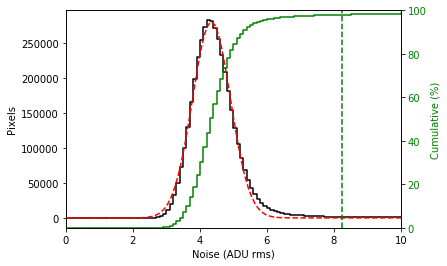

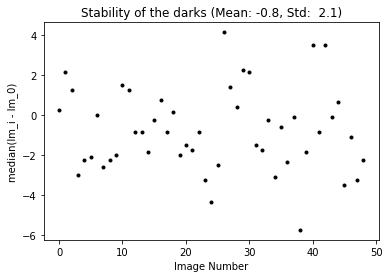

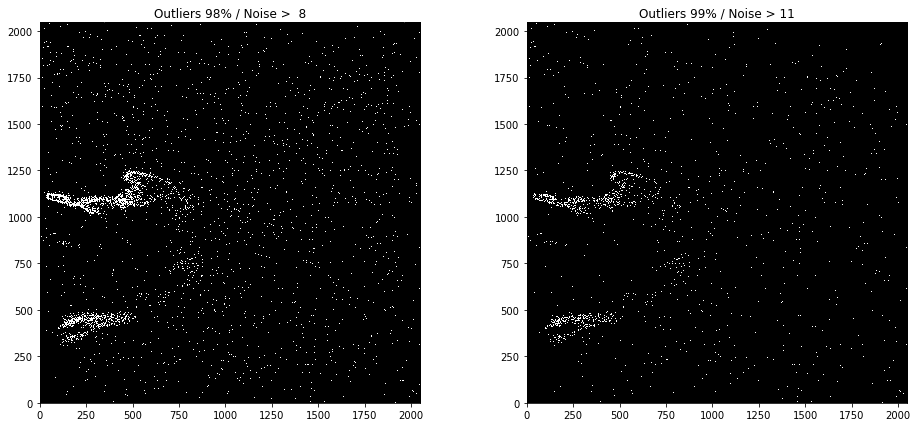

################################################################################
# UTR_10sec                                                                    #
################################################################################
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 3
    chi-square         = 3.8041e+09
    reduced chi-square = 19310238.7
    Akaike info crit   = 3358.20648
    Bayesian info crit = 3368.10143
[[Variables]]
    sigma:      0.47611769 +/- 0.00305142 (0.64%) (init = 0.5)
    center:     3.68414608 +/- 0.00305142 (0.08%) (init = 3.65)
    amplitude:  398363.661 +/- 2211.04933 (0.56%) (init = 503890.5)
    fwhm:       1.12117145 +/- 0.00718555 (0.64%) == '2.3548200*sigma'
    height:     333791.666 +/- 1852.65271 (0.56%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(s

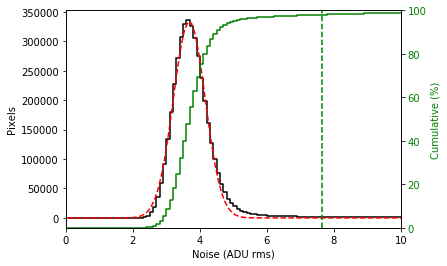

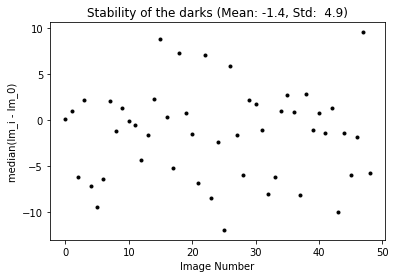

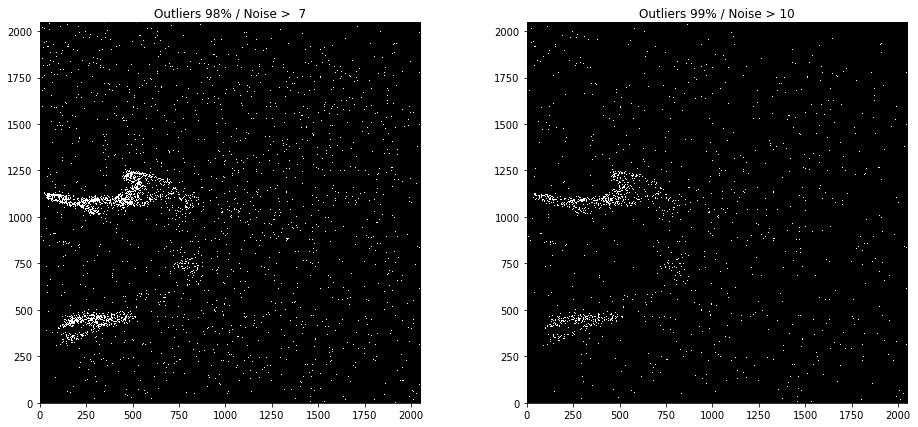

################################################################################
# UTR_60sec                                                                    #
################################################################################
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 200
    # variables        = 3
    chi-square         = 6.7662e+09
    reduced chi-square = 34346172.3
    Akaike info crit   = 3473.37750
    Bayesian info crit = 3483.27245
[[Variables]]
    sigma:      0.32293895 +/- 0.00228661 (0.71%) (init = 0.3)
    center:     2.36780252 +/- 0.00228660 (0.10%) (init = 2.35)
    amplitude:  396044.658 +/- 2428.54620 (0.61%) (init = 443986.2)
    fwhm:       0.76046310 +/- 0.00538455 (0.71%) == '2.3548200*sigma'
    height:     489253.363 +/- 3000.10029 (0.61%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(s

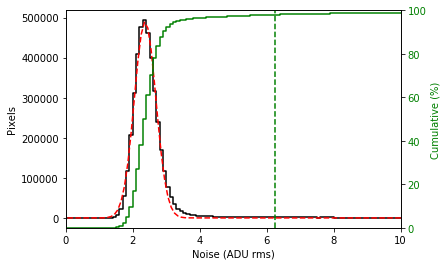

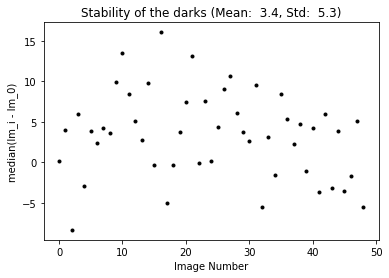

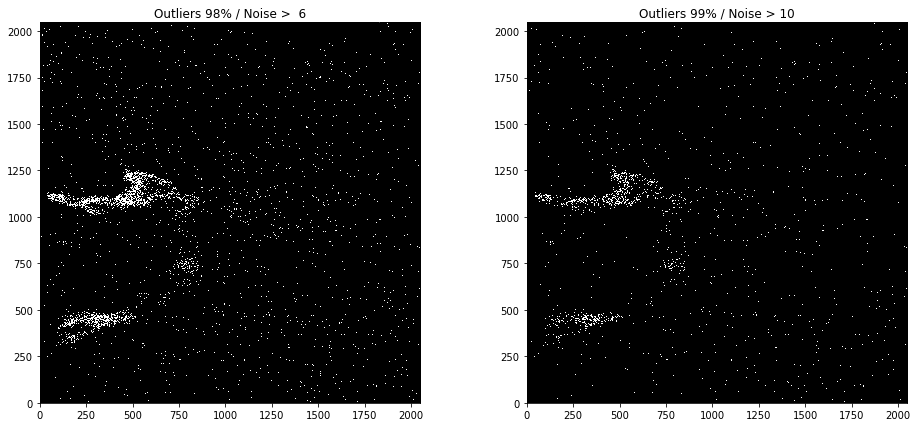

################################################################################
# CDS_2sec                                                                     #
################################################################################
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 200
    # variables        = 3
    chi-square         = 3.0036e+09
    reduced chi-square = 15246662.4
    Akaike info crit   = 3310.95151
    Bayesian info crit = 3320.84646
[[Variables]]
    sigma:      0.55500749 +/- 0.00339892 (0.61%) (init = 0.6)
    center:     4.32267196 +/- 0.00339893 (0.08%) (init = 4.35)
    amplitude:  399956.254 +/- 2121.21864 (0.53%) (init = 520617.6)
    fwhm:       1.30694274 +/- 0.00800385 (0.61%) == '2.3548200*sigma'
    height:     287490.655 +/- 1524.74368 (0.53%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(s

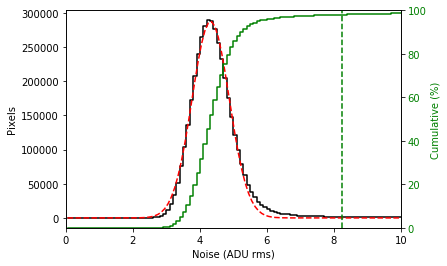

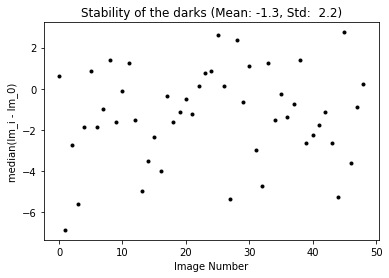

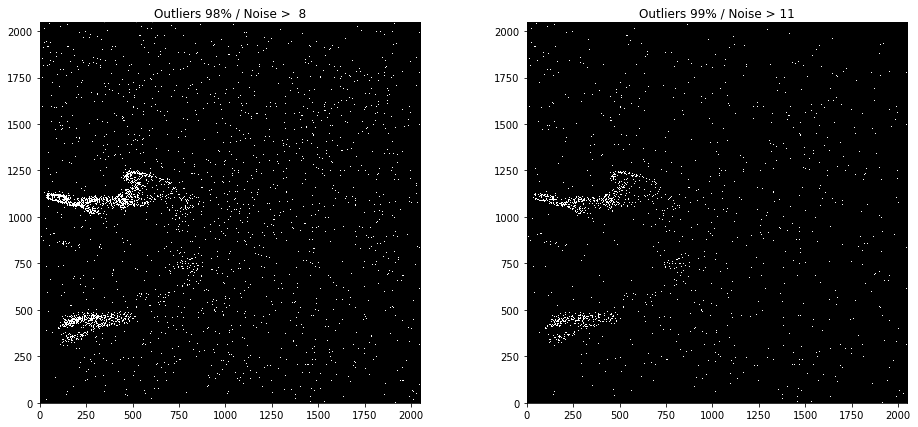

################################################################################
# CDS_10sec                                                                    #
################################################################################
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 200
    # variables        = 3
    chi-square         = 3.1778e+09
    reduced chi-square = 16130778.3
    Akaike info crit   = 3322.22521
    Bayesian info crit = 3332.12016
[[Variables]]
    sigma:      0.57480629 +/- 0.00369431 (0.64%) (init = 0.65)
    center:     4.41585744 +/- 0.00369432 (0.08%) (init = 4.4)
    amplitude:  398928.073 +/- 2220.43063 (0.56%) (init = 542817.6)
    fwhm:       1.35356536 +/- 0.00869945 (0.64%) == '2.3548200*sigma'
    height:     276874.635 +/- 1541.08296 (0.56%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(s

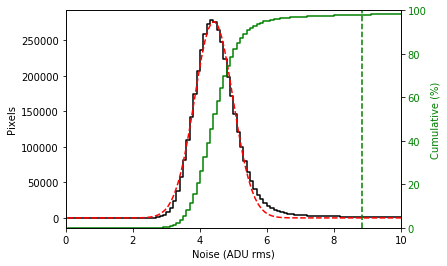

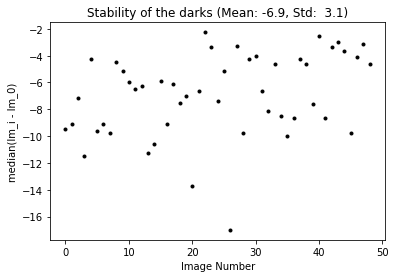

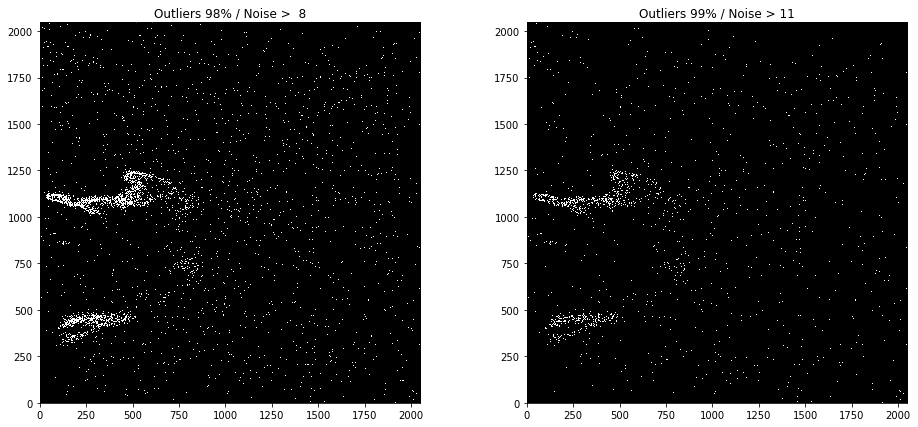

################################################################################
# CDS_60sec                                                                    #
################################################################################
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 3
    chi-square         = 3.0693e+09
    reduced chi-square = 15579964.7
    Akaike info crit   = 3315.27654
    Bayesian info crit = 3325.17149
[[Variables]]
    sigma:      0.58647314 +/- 0.00375766 (0.64%) (init = 0.6)
    center:     4.54575201 +/- 0.00375766 (0.08%) (init = 4.55)
    amplitude:  397244.346 +/- 2204.22867 (0.55%) (init = 489403.8)
    fwhm:       1.38103869 +/- 0.00884860 (0.64%) == '2.3548200*sigma'
    height:     270221.364 +/- 1499.40525 (0.55%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(s

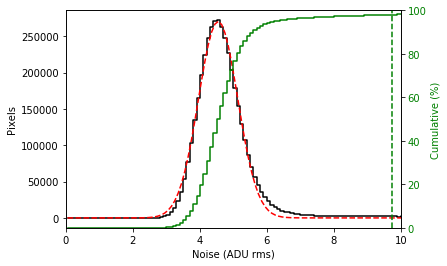

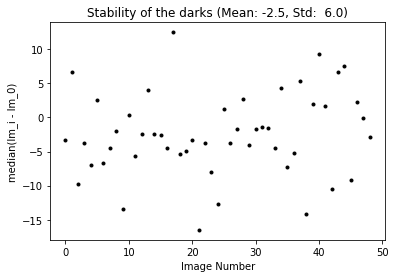

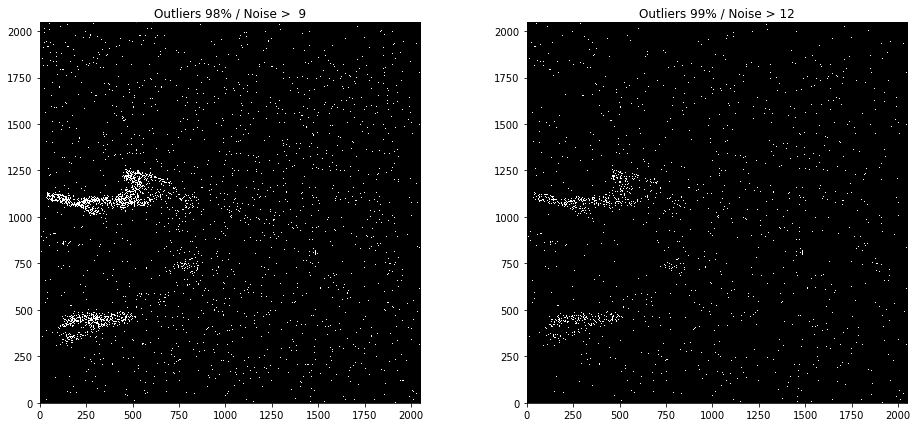

################################################################################
# FWLR_2sec                                                                    #
################################################################################
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 200
    # variables        = 3
    chi-square         = 3.0586e+09
    reduced chi-square = 15526112.7
    Akaike info crit   = 3314.58404
    Bayesian info crit = 3324.47900
[[Variables]]
    sigma:      0.57850833 +/- 0.00364474 (0.63%) (init = 0.65)
    center:     4.39961665 +/- 0.00364474 (0.08%) (init = 4.4)
    amplitude:  400541.664 +/- 2185.42001 (0.55%) (init = 543745.8)
    fwhm:       1.36228298 +/- 0.00858271 (0.63%) == '2.3548200*sigma'
    height:     276215.578 +/- 1507.07757 (0.55%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(s

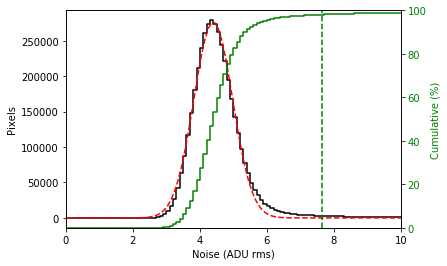

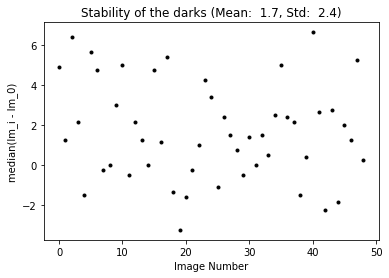

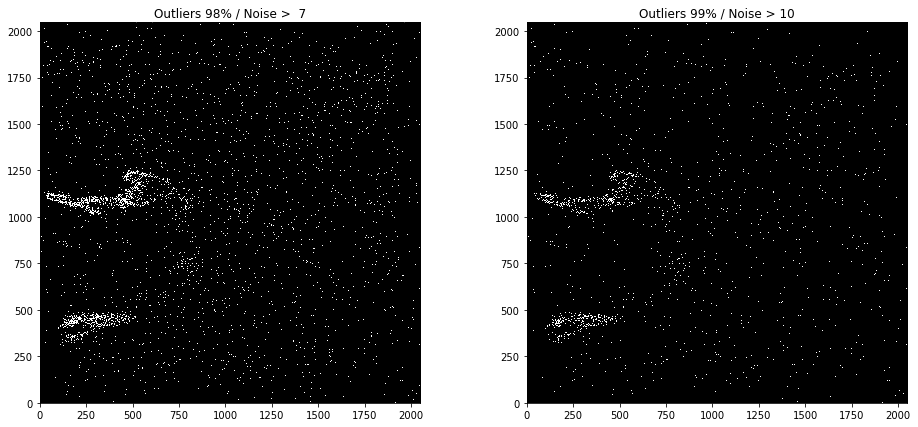

################################################################################
# FWLR_10sec                                                                   #
################################################################################
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 3
    chi-square         = 3.3717e+09
    reduced chi-square = 17115401.3
    Akaike info crit   = 3334.07513
    Bayesian info crit = 3343.97008
[[Variables]]
    sigma:      0.58088561 +/- 0.00386521 (0.67%) (init = 0.6)
    center:     4.44944674 +/- 0.00386522 (0.09%) (init = 4.45)
    amplitude:  399002.993 +/- 2299.26211 (0.58%) (init = 494919)
    fwhm:       1.36788105 +/- 0.00910187 (0.67%) == '2.3548200*sigma'
    height:     274028.430 +/- 1579.09576 (0.58%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sig

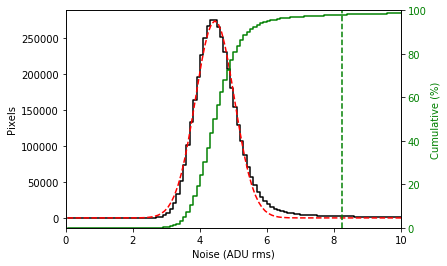

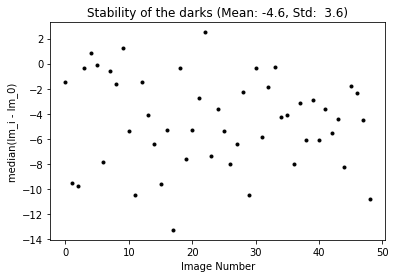

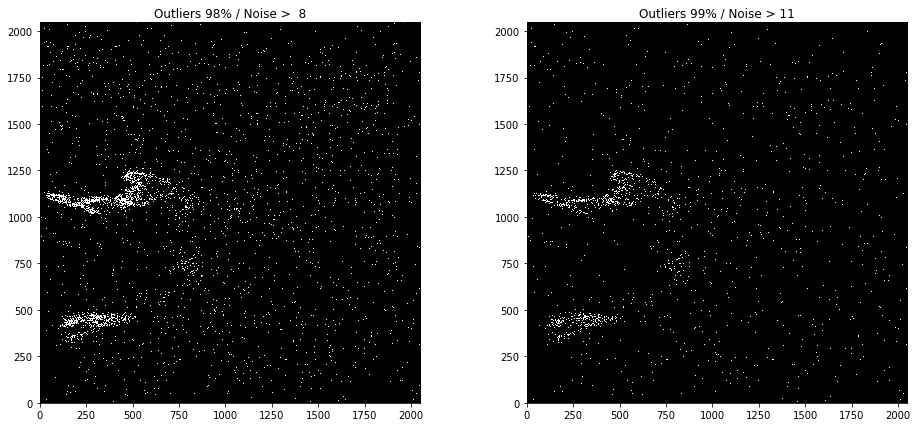

################################################################################
# FWLR_60sec                                                                   #
################################################################################
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 3
    chi-square         = 2.8656e+09
    reduced chi-square = 14546000.0
    Akaike info crit   = 3301.54259
    Bayesian info crit = 3311.43754
[[Variables]]
    sigma:      0.59972971 +/- 0.00375225 (0.63%) (init = 0.65)
    center:     4.61104521 +/- 0.00375226 (0.08%) (init = 4.6)
    amplitude:  397497.443 +/- 2153.77357 (0.54%) (init = 519918.7)
    fwhm:       1.41225552 +/- 0.00883588 (0.63%) == '2.3548200*sigma'
    height:     264416.688 +/- 1432.70042 (0.54%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(s

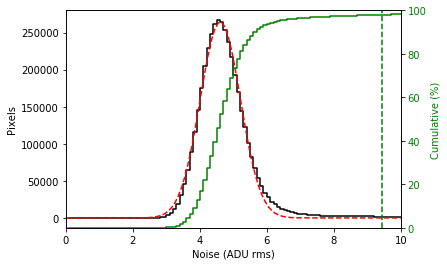

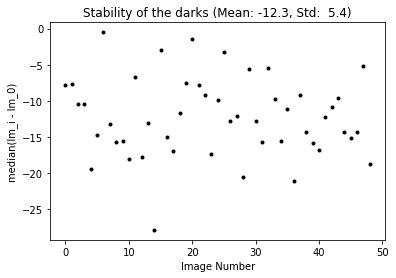

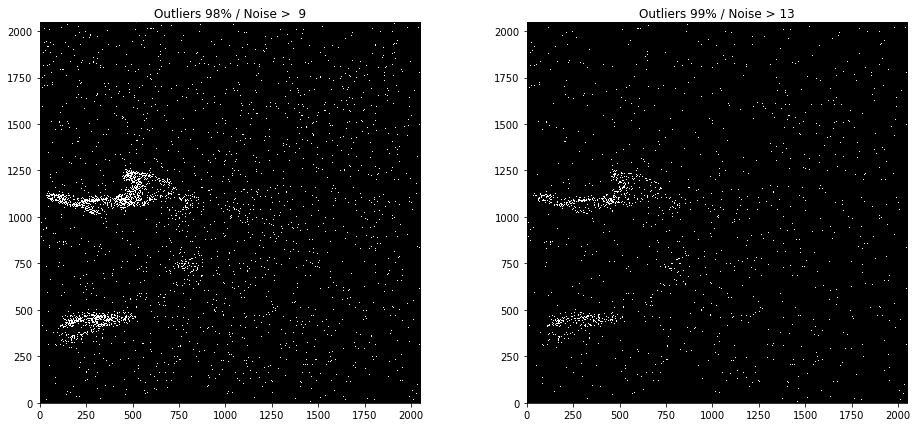

In [8]:
for i in range(9):
    doAnalysis(slice(selects[i][0], selects[i][1]), suffixes[i])

In [9]:
exps = array([2., 10., 60.])
RNs = array(RNs)
for i in range(3):
    print "==> Results for %ds darks:" % exps[i]
    print "UTR    - %5.2f ADU rms with sigma %.2f" % (RNs[i], RN_std[i])
    print "CDS    - %5.2f ADU rms with sigma %.2f" % (RNs[3+i], RN_std[3+i])
    print "FOWLER - %5.2f ADU rms with sigma %.2f" % (RNs[6+i], RN_std[6+i])

==> Results for 2s darks:
UTR    -  4.35 ADU rms with sigma 0.57
CDS    -  4.32 ADU rms with sigma 0.56
FOWLER -  4.40 ADU rms with sigma 0.58
==> Results for 10s darks:
UTR    -  3.68 ADU rms with sigma 0.48
CDS    -  4.42 ADU rms with sigma 0.57
FOWLER -  4.45 ADU rms with sigma 0.58
==> Results for 60s darks:
UTR    -  2.37 ADU rms with sigma 0.32
CDS    -  4.55 ADU rms with sigma 0.59
FOWLER -  4.61 ADU rms with sigma 0.60


Text(0.5,0,'Integration Time (secs)')

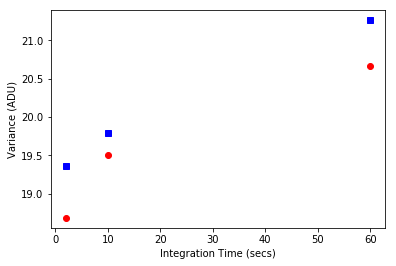

In [10]:
plot(exps, RNs[3:6]**2, 'ro')
plot(exps, RNs[6:9]**2, 'bs')
ylabel('Variance (ADU)')
xlabel('Integration Time (secs)')

In [11]:
import pickle
infile = open("linearity_coef")
pol = poly1d(pickle.load(infile))
infile.close()

In [12]:
test_ids = ['PER-124-04-1']
config = {'test_ids' : test_ids, 'data_dir' : data_dir}
NIX_GL = NIX_Image_List(config)
im1 = NIX_GL[48].getImage(dark=NIX_GL[8], linearize=pol)
im2 = NIX_GL[58].getImage(dark=NIX_GL[18], linearize=pol)
response = im2/im1/2.
fits.PrimaryHDU(response).writeto("out/pixel_response.fits", overwrite=True)

/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 3
    chi-square         = 1.2260e+08
    reduced chi-square = 622336.502
    Akaike info crit   = 2671.22452
    Bayesian info crit = 2681.11947
[[Variables]]
    sigma:      0.00473367 +/- 9.7796e-06 (0.21%) (init = 0.005249977)
    center:     1.00298290 +/- 9.7796e-06 (0.00%) (init = 1.003)
    amplitude:  1211.61875 +/- 2.16780654 (0.18%) (init = 1613.974)
    fwhm:       0.01114694 +/- 2.3029e-05 (0.21%) == '2.3548200*sigma'
    height:     102112.300 +/- 182.697454 (0.18%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577


/home/ydallilar/.miniconda2/lib/python2.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


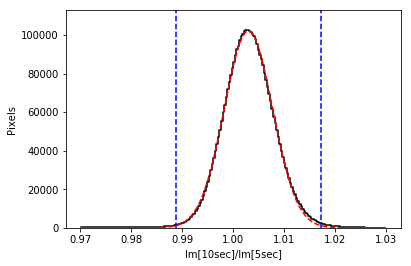

0.98878188805 1.01718391039


In [13]:
hist, bins = histogram(ravel(response), 200, range=[.97, 1.03])
bins = (bins[1:]+bins[:-1])*0.5
plot(bins, hist, 'k', drawstyle='steps-mid')
ylabel('Pixels')
xlabel('Im[10sec]/Im[5sec]')

bins = bins.astype(float)
model = GaussianModel()
pars = model.guess(hist, x=bins)
out = model.fit(hist, pars, x=bins)
plot(bins, out.best_fit, 'r--')
print out.fit_report()
center = out.params['center'].value
sigma = out.params['sigma'].value
maxp = max(hist)*1.1
plot([center-3*sigma, center-3*sigma], [0, maxp], 'b--')
plot([center+3*sigma, center+3*sigma], [0, maxp], 'b--')
ylim([0, maxp])
show()

print center-3*sigma, center+3*sigma

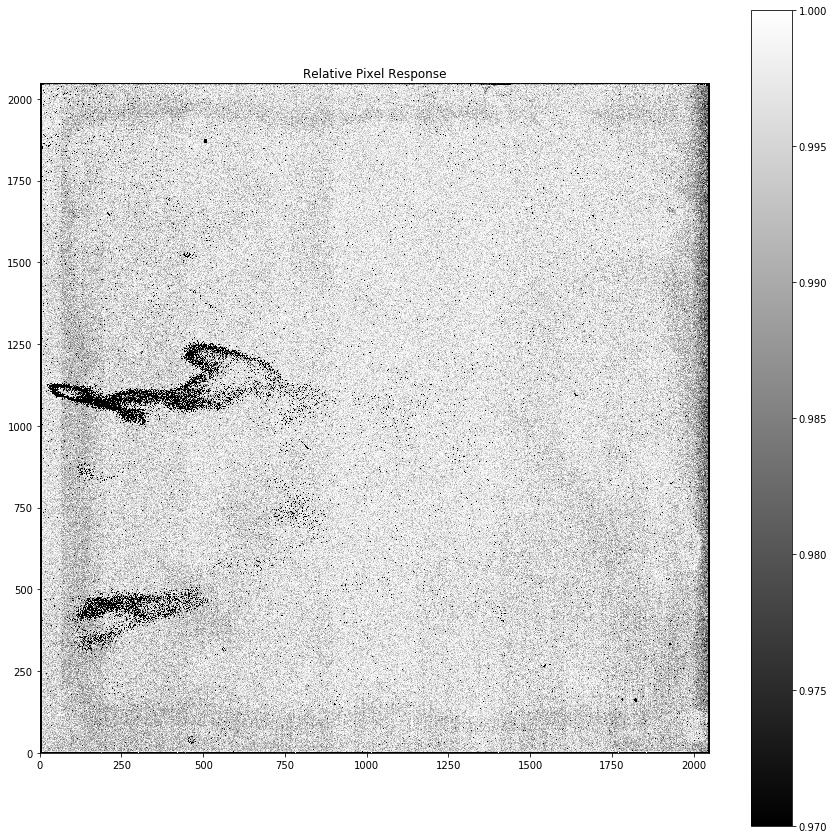

In [18]:
figure(figsize=(15,15))
imshow(response, cmap='gray')
title('Relative Pixel Response')
colorbar()
gca().invert_yaxis()
clim([0.97, 1.0])